INTRO : we will covering practical implementation of ml theoritical stuff.

DATASET : Boston housing dataset .
    
AIM : to predict price of house .
    


In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# lets load the dataset 


In [5]:
# boston house pricing dataset 

# from sklearn.datasets import load_boston # but it is removed from sklearn from version 1.2

boston =  pd.read_csv("C:\\Users\\lenovo\\Downloads\\boston\\HousingData.csv")



In [6]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
'''from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset
boston = fetch_openml(data_id=42165)

# Extract the data and target variables
X, y = boston.data, boston.target

'''

'from sklearn.datasets import fetch_openml\n\n# Load the Boston Housing dataset\nboston = fetch_openml(data_id=42165)\n\n# Extract the data and target variables\nX, y = boston.data, boston.target\n\n'

In [8]:
''''from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset
boston = fetch_openml(data_id=42165, as_frame=True)

# Extract the data and target variables
X = boston.data  # Features
y = boston.target  # Target variable (median house prices)

# Access the feature names
feature_names = boston.feature_names

# Access the dataset description
description = boston.DESCR

# If you want a Pandas DataFrame instead of a Bunch object, you can set as_frame=True
# The data and target variables will be DataFrames in this case
X_df = X
y_df = y'''


"'from sklearn.datasets import fetch_openml\n\n# Load the Boston Housing dataset\nboston = fetch_openml(data_id=42165, as_frame=True)\n\n# Extract the data and target variables\nX = boston.data  # Features\ny = boston.target  # Target variable (median house prices)\n\n# Access the feature names\nfeature_names = boston.feature_names\n\n# Access the dataset description\ndescription = boston.DESCR\n\n# If you want a Pandas DataFrame instead of a Bunch object, you can set as_frame=True\n# The data and target variables will be DataFrames in this case\nX_df = X\ny_df = y"

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


DESCR : discription
    

In [10]:
#lets check the discription of the dataset 
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Features: The dataset contains 13 different features (input variables) that are used to predict the median house price. These features include information such as:



CRIM

per capita crime rate by to  (per person crime rate)wn

ZN

proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS

proportion of non-retail business acres per town

CHAS

Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX

nitric oxides concentration (parts per 10 million)

RM

average number of rooms per dwelling

AGE

proportion of owner-occupied units built prior to 1940

DIS

weighted distances to five Boston employment centers

RAD

index of accessibility to radial highways

TAX

full-value property-tax rate per $10,000

PTRATIO

pupil-teacher ratio by town

B

1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town

LSTAT

% lower status of the population

MEDV

Median value of owner-occupied homes in $1000’s

# preparing the dataset

In [11]:
boston["price"] = boston["MEDV"]

In [12]:
boston = boston.drop("MEDV" ,axis =1)

In [13]:
#check missing value
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
price       0
dtype: int64

In [14]:
# Calculate the mean of each column (ignoring NaN values)
column_means = boston.mean()

# Replace NaN values with column means using fillna
boston_filled = boston.fillna(column_means)

# df_filled now contains the original DataFrame with NaN values replaced by column means





In this code:

We create a sample DataFrame df with missing values (NaN).

We calculate the mean of each column using the mean() method. By default, the mean() method ignores NaN values when computing the mean.

We use the fillna() method to replace NaN values in the DataFrame with the corresponding column mean values. This fills in the missing values with the mean of each column.

After this process, df_filled will contain the original DataFrame with NaN values replaced by the mean of each column. You can adjust the column_means calculation to exclude specific columns or customize the handling of NaN values if needed.





In [15]:
boston_filled.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [16]:
boston = boston_filled

In [17]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [18]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [19]:
### exploratory  data analysis
## correlation 

boston.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [20]:
#pip install --upgrade notebook


# two type of correlation (-1 to +1) , 0 not correlation
1. **corr between two independent features**  (so we can exclude another one )
   when  high correlation between twon independent feature, called **multi-collinearity**
   we can discard another feature .(close to -1 and +1)
3. **corr between independent and output feature (price)**
   good to keep features  with high correlation value 
   
   

In [ ]:
#analys corr with help of plots
import seaborn as sns

sns.pairplot(boston)

Text(0, 0.5, 'price')

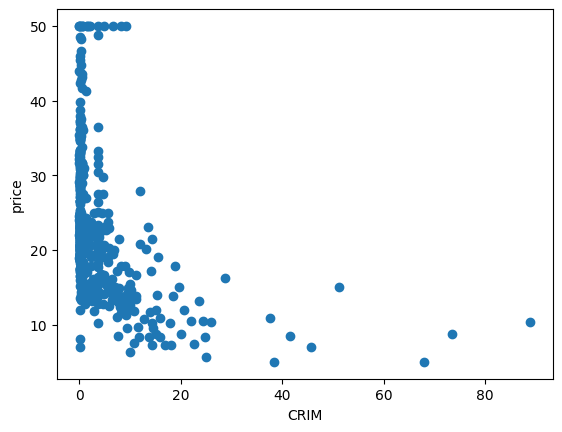

In [22]:
plt.scatter(boston["CRIM"],boston["price"])
plt.xlabel("CRIM")
plt.ylabel("price")


Text(0, 0.5, 'price')

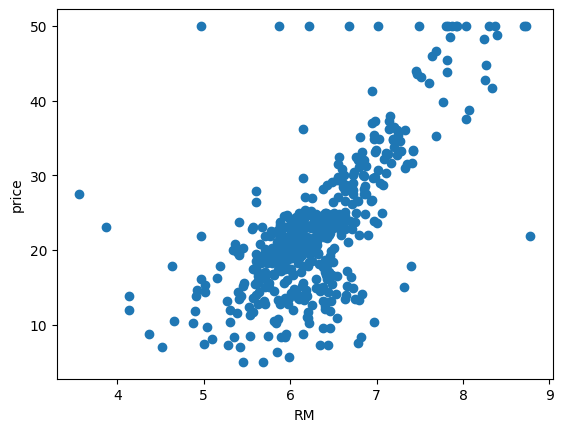

In [23]:
plt.scatter(boston["RM"],boston["price"])
plt.xlabel("RM")
plt.ylabel("price")


<Axes: xlabel='RM', ylabel='price'>

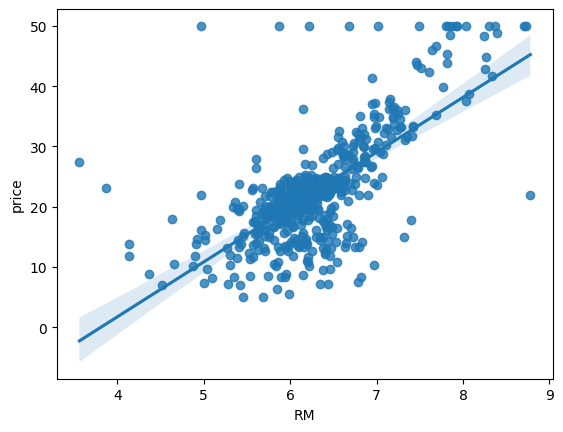

In [24]:
#CREATE REGRESSION PLOT
import seaborn as sns
sns.regplot(x="RM",y ="price",data= boston)

there is positive correlation 

<Axes: xlabel='LSTAT', ylabel='price'>

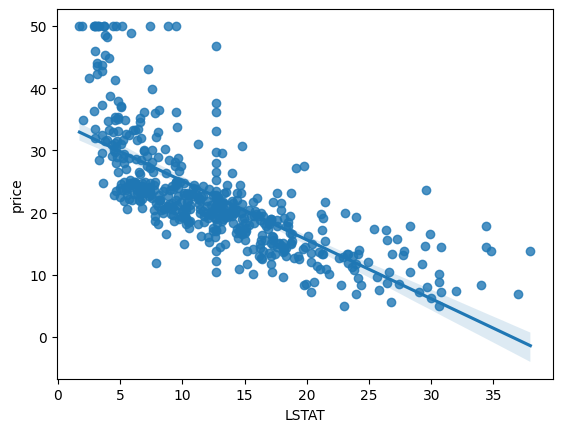

In [25]:
sns.regplot(x = "LSTAT" ,y= "price",data = boston)

<Axes: xlabel='CHAS', ylabel='price'>

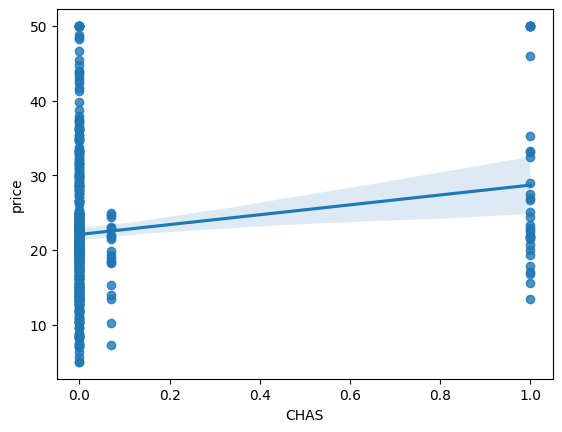

In [26]:
sns.regplot(x = "CHAS" ,y = "price" ,data = boston)

to create a better regression model ,**linearity** , should be there in dataset .

means , when x incresing , y ia incresing 
        when x is decresing , y is decreasing , 
    
or  **inverse relationship**( when x increasing , y decreasing 
                          when x is decreasing , y is incresing)


<Axes: xlabel='PTRATIO', ylabel='price'>

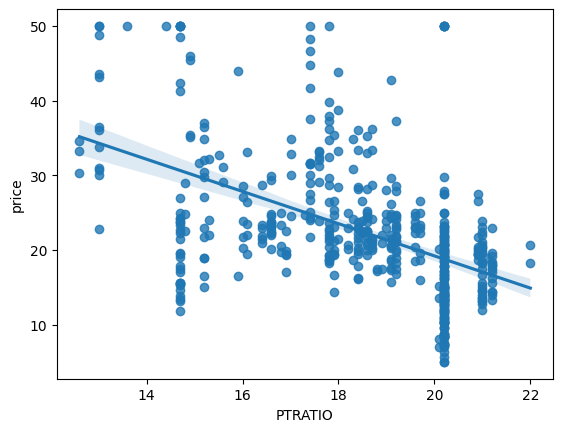

In [27]:
# ptratio
sns.regplot(x = "PTRATIO" ,y = "price", data = boston)

# create our model

**1.independent and dependent features**

In [28]:
X = boston.iloc[:,:-1]
y = boston.iloc[: ,-1]


In [29]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [30]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

**2.train test split**

In [31]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.3 ,random_state = 42)

In [32]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.270000


In [33]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.040000
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.530000
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.070000
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.520000
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.100000,0.0,0.740,6.406,97.200000,2.0651,24,666,20.2,385.96,12.715432
23,0.98843,0.0,8.140000,0.0,0.538,5.813,100.000000,4.0952,4,307,21.0,394.54,19.880000
225,0.52693,0.0,6.200000,0.0,0.504,8.725,83.000000,2.8944,8,307,17.4,382.00,4.630000
433,5.58107,0.0,18.100000,0.0,0.713,6.436,87.900000,2.3158,24,666,20.2,100.19,16.220000


In [34]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: price, Length: 354, dtype: float64

In [35]:
y_test


173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: price, Length: 152, dtype: float64

**3. standard scaling**



# FEATURE SCALING STEP :

it is done by many methods .but where we need scaling ? algorithm which 

* calculate distance :
  * k- Nearest neighbours (KNN)
  * k-Mean]
  * SVM
  * PCA
  * LDA
    
* Gradient based algorithm
  * linear regression
  * logistic regression
  * neural network

* Tree based algorithm not require
  * random forest
  * decision tree
  * XGBoost
    

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [37]:
X_train = scaler.fit_transform(X_train)


In [38]:
X_test = scaler.transform(X_test)

# we are not writing fit_transform beacuase , our model does not know more about test datset


In [39]:
X_train

array([[-0.42002854, -0.51161896, -1.31729854, ...,  0.18727079,
         0.39651419, -1.04595325],
       [-0.4076886 , -0.51161896, -0.15405495, ..., -0.21208981,
         0.3870674 ,  0.03449941],
       [-0.40285597, -0.51161896, -0.61459839, ..., -0.16771641,
         0.42854113, -0.3261728 ],
       ...,
       [-0.42182865,  3.06664934, -1.34255415, ..., -0.56707702,
         0.35987906, -0.9336675 ],
       [ 0.93011786, -0.51161896,  1.04781486, ...,  0.8528718 ,
        -2.87841346,  1.55389374],
       [-0.39590057, -0.51161896, -0.36947043, ...,  1.16348561,
        -3.32828832, -0.26571124]])

 **question :**  why to do scaling ?

 **answer :** when we will calculate gradient descent . scaling is very important , at that time our all indepedent features should be properly scaled , so that we can quickly converse to the global minima .


# Model Traning 

In [40]:
from sklearn.linear_model import LinearRegression


In [41]:
regression = LinearRegression()

In [76]:
# we fit the model
regression.fit(X_train ,y_train)

LinearRegression()

In [43]:
#print coefficients
regression.coef_

array([-1.06184703,  0.71347682, -0.07272768,  0.94344207, -1.62856223,
        3.17333232, -0.70109167, -3.04177516,  1.69879013, -1.20047368,
       -1.99733627,  1.02127847, -3.28653232])

In [44]:
regression.intercept_     # one intersept

23.01581920903955

* the intercept (often denoted as "b₀" or "intercept term") represents the predicted value of the dependent variable (the target or response variable) when all independent variables (predictors or features) are equal to zero. Here's a practical and intuitive explanation of what the intercept indicates:

* The intercept represents the baseline prediction when all independent variables are set to zero. It's a single value that sets the initial starting point for the regression line on the y-axis. 

In [45]:
## on which paramters model have been traned 
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

**copy_X:** 
This hyperparameter controls whether a copy of the input data (X) should be made before fitting the model. 
If copy_X is set to True, a copy is made, which can be useful to ensure that the original input data remains unchanged. 
If set to False, the model may modify the input data during training. 

**fit_intercept:**
This hyperparameter determines whether the model should include an intercept term (also known as a bias term) in the regression equation. 

If fit_intercept is set to True, the model will estimate an intercept.

If set to False, the model assumes there is no intercept, 
and the regression line passes through the origin (0,0). 

* In most cases, you would want to set this to True because including an intercept is often appropriate.


**n_jobs:**
This hyperparameter specifies the number of CPU cores to use for parallel processing during model training.

Setting it to None means that the model will use the default number of cores available on your machine. 

If you want to utilize multiple cores for faster training, you can set it to an integer value greater than 1, indicating the number of cores to use.

If you prefer to use all available cores, you can set it to -1. Note that  
* not all scikit-learn models support parallel processing.

**positive:**

This hyperparameter is specific to certain linear regression variants, such as non-negative least squares regression. 

When set to True, it enforces that the coefficients (weights) learned by the model are non-negative, meaning they cannot be less than zero.

This constraint can be useful in cases where you want to ensure that the predicted values are non-negative, like in some economic or physical modeling scenarios. For standard linear regression, this is typically set to False.

These hyperparameters control various aspects of how the linear regression model behaves during training and prediction. Depending on your specific problem and data, you may adjust these hyperparameters to achieve the desired modeling behavior and performance.







In [46]:
# once we train our model , we do  prediction

reg_pred = regression.predict(X_test)
reg_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

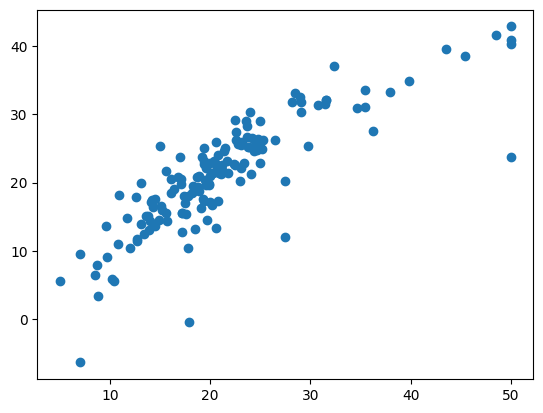

In [47]:
# lets creat a plot . to get idea about how well prediction is done
# lets plot scatter plot

plt.scatter(y_test, reg_pred)

In [48]:
#model is linear so model is predicted well


In [49]:
residuals = y_test -reg_pred

In [50]:
residuals

173   -5.346842
274   -4.680947
491   -1.563343
72    -2.799770
452   -2.420504
         ...   
441   -3.386594
23     0.905782
225    9.774023
433   -2.093079
447   -5.269098
Name: price, Length: 152, dtype: float64

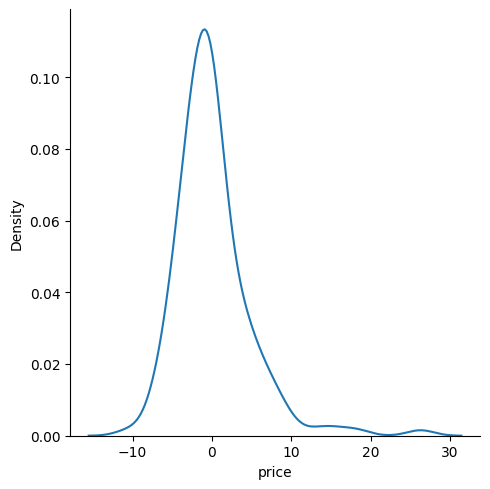

In [51]:
##plottig this residuals 

sns.displot(residuals , kind ="kde")

this curve is normal but there is some error .some outliers.


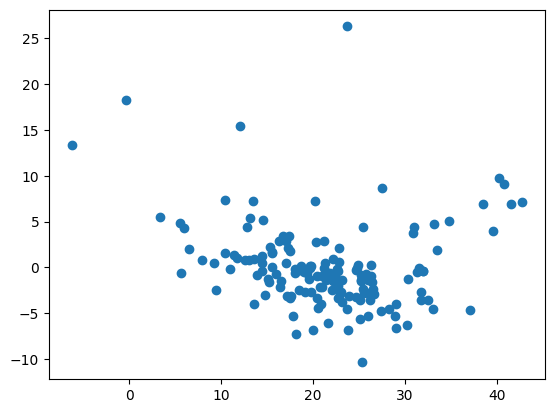

In [52]:
# scatter plot with respect to predictinos and residuals 
plt.scatter(reg_pred , residuals) 

In [53]:
# performance metric

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test ,reg_pred))
print(mean_absolute_error(y_test , reg_pred))
print(np.sqrt(mean_squared_error(y_test , reg_pred)))

21.818457953526046
3.141052567108469
4.6710232233982785


In practice, RMSE values can range from 0 to positive infinity.
A lower RMSE indicates better model performance, with 0 being a perfect fit (when predicted values match actual values exactly).

In practice, MSE values can range from 0 to positive infinity.
Like RMSE and MAE, lower MSE values indicate better model performance, with 0 being a perfect fit.

# R square and adjusted R square 


**formula**  : also known as coefficeint of determination

**R^2 = 1 - SSR/SST**

SSR : sum of squares of residuals , SST : total sum of square .

In [54]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7071862632031756


**formula**
**Ajusted R^2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

n : number of observation , k : number of predictors


In [55]:
score2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(score2)      # less than r2 score .

0.6796023604614457


# New data 
we will get single data point for prediction

In [64]:
boston.iloc[0].shape       # it is one dimensions      (first row)

(14,)

In [71]:
boston.iloc[0,:-1].shape

(13,)

In [81]:
# convert this into some other shape 
boston.iloc[0,:-1].values.reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [73]:
# reshape 
boston_row = boston.iloc[0,:-1]
reshaped_row = boston_row.values.reshape(1, -1)
print(reshaped_row)

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]


In [74]:
reshaped_row.shape

(1, 13)

In [90]:
regression.predict(scaler.transform(reshaped_row))

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.2586963])

In [83]:
# whenever we get new data , do standardization , 
scaler.transform(reshaped_row)

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42288276,  0.29349141, -1.29798543, -0.28851904, -0.16513629,
         0.34715902, -0.1318439 ,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.07906315]])

# pickling the model file for deployment
we have to pickle our model , so that we can deploy it .


In [60]:
import pickle

In [85]:

# in order to convert this into pickle file , we do dump operation

pickle.dump(regression, open("regmodel.pkl", "wb"))   #regression model

# on which file we are going to put this entire ojbect there  : open("regmodel.pkl", "wb")
# in write mode , if this file does not exist ,
# this is serialized fiile formate file , so that it can be deployed .


In [88]:
# load 
pickled_model = pickle.load(open('regmodel.pkl','rb'))   # in read bite mode

In [89]:
# can we now prediction for rehsaped_row

pickled_model.predict(scaler.transform(reshaped_row))

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.2586963])